In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 图表的基本元素
- 图名、图例、轴标签、轴边界、轴刻度、轴刻度标签等，是图表内的基本参数

          A         B
0  0.940517  0.632741
1  0.737469  0.758548
2  0.525028  0.112491
3  0.275365  0.910221
4  0.054539  0.581412
5  0.782771  0.595406
6  0.945412  0.979293
7  0.806362  0.221773
8  0.426188  0.120835
9  0.337574  0.255362


[Text(0, 0, '0.00'),
 Text(0, 0, '0.20'),
 Text(0, 0, '0.40'),
 Text(0, 0, '0.60'),
 Text(0, 0, '0.80'),
 Text(0, 0, '1.00'),
 Text(0, 0, '1.20')]

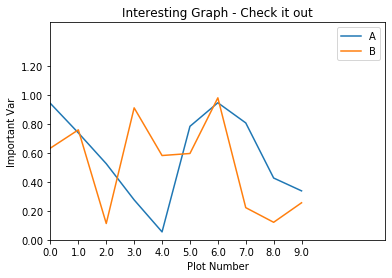

In [12]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['A', 'B'])
print(df)
fig = df.plot(figsize=(6,4))
plt.title('Interesting Graph - Check it out') # 图名
plt.xlabel('Plot Number') # X轴标签
plt.ylabel('Important Var') # Y轴标签
plt.legend(loc='upper right')
# 显示图例，loc表示位置
# 'best'         : 0, (only implemented for axes legends)(自适应方式)
# 'upper right'  : 1,
# 'upper left'   : 2,
# 'lower left'   : 3,
# 'lower right'  : 4,
# 'right'        : 5,
# 'center left'  : 6,
# 'center right' : 7,
# 'lower center' : 8,
# 'upper center' : 9,
# 'center'       : 10,

plt.xlim([0, 12]) # X轴边界
plt.ylim([0, 1.5]) # Y轴边界
plt.xticks(range(10)) # X刻度
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]) # Y刻度
fig.set_xticklabels('%.1f' %i for i in range(10)) # X轴刻度标签
fig.set_yticklabels('%.2f' %i for i in [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]) # Y轴刻度标签

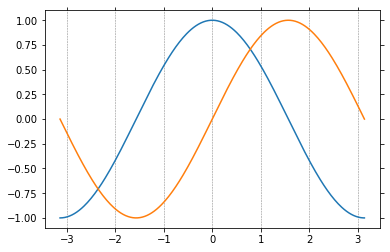

In [16]:
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
c, s = np.cos(x), np.sin(x)
plt.plot(x, c)
plt.plot(x, s)

plt.grid(True, linestyle='--', color='gray', linewidth='0.5', axis='x')
# 显示网格
# linestyle：线型
# color：颜色
# linewidth：宽度
# axis：x，y，both，显示x/y/两者的格网


plt.tick_params(bottom='on', top='off', left='on', right='off')

# 图表的样式参数
- linestyle, sytle, color, marker

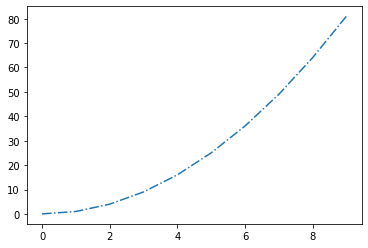

In [23]:
plt.plot([i**2 for i in range(10)], linestyle='-.')
# '-'       solid line style
# '--'      dashed line style
# '-.'      dash-dot line style
# ':'       dotted line style

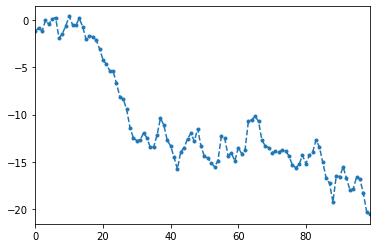

In [24]:
s = pd.Series(np.random.randn(100).cumsum())
s.plot(linestyle='--', marker='.')
# '.'       point marker
# ','       pixel marker
# 'o'       circle marker
# 'v'       triangle_down marker
# '^'       triangle_up marker
# '<'       triangle_left marker
# '>'       triangle_right marker
# '1'       tri_down marker
# '2'       tri_up marker
# '3'       tri_left marker
# '4'       tri_right marker
# 's'       square marker
# 'p'       pentagon marker
# '*'       star marker
# 'h'       hexagon1 marker
# 'H'       hexagon2 marker
# '+'       plus marker
# 'x'       x marker
# 'D'       diamond marker
# 'd'       thin_diamond marker
# '|'       vline marker
# '_'       hline marker


# 图表绘制
- 图表类别：线形图、柱状图、密度图，以横纵坐标两个维度为主，同时可延展出多种其他图表样式
```python
plt.plot(kind='line', ax=None, figsize=None, use_index=True, title=None, grid=None, legend=False, 
style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, label=None, secondary_y=False, **kwds)
```

1. 基本图表绘制

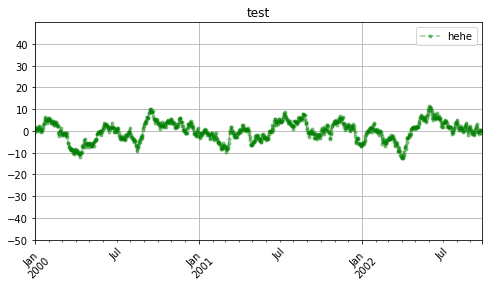

In [5]:
# series生成图表
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot(kind='line',
       style='--g.',
       label='hehe',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       ylim=[-50, 50],
       yticks=list(range(-50, 50, 10)),
       figsize=(8, 4),
       title='test',
       legend=True)
# use_index → 将索引用为刻度标签，默认为True
# rot → 旋转刻度标签，0-360
# grid → 显示网格，一般直接用plt.grid

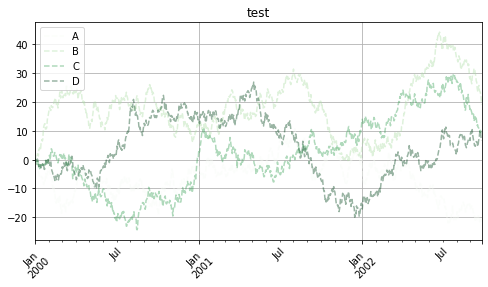

In [8]:
# dataframe生层图表
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
df.plot(kind='line',
       style='--',
       alpha=0.4,
       use_index=True,
       rot=45,
       grid=True,
       figsize=(8,4),
       title='test',
       legend=True,
       subplots=False, # subplots=True，比对不同的结果
       colormap='Greens')

2. 柱状图、堆叠图

plt.plot(kind='bar/barh'),
plt.bar()

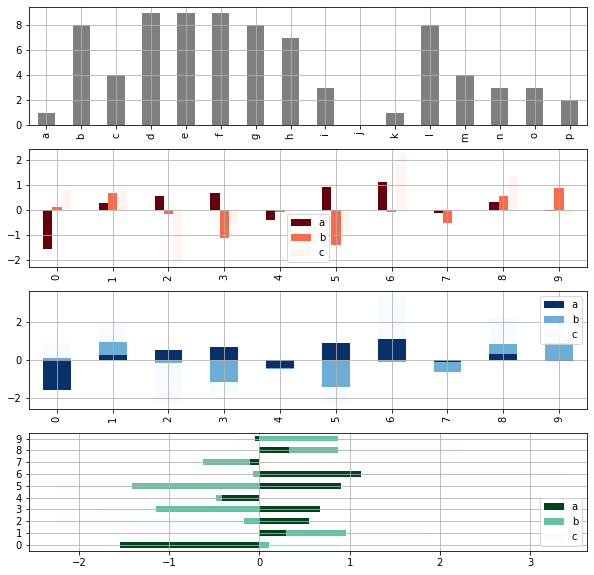

In [16]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
s = pd.Series(np.random.randint(0, 10, 16), index=list('abcdefghijklmnop'))
df = pd.DataFrame(np.random.randn(10, 3), columns=['a', 'b', 'c'])

s.plot(kind='bar', color='k', grid=True, alpha=0.5, ax=axes[0]) # ax参数：选择第几个子图
df.plot(kind='bar', grid=True, colormap='Reds_r', ax=axes[1])
df.plot(kind='bar', grid=True, colormap='Blues_r', stacked=True, ax=axes[2])
df.plot.barh(ax = axes[3],grid = True,stacked=True,colormap = 'BuGn_r')